<a href="https://colab.research.google.com/github/parakram93/ml_foundations/blob/main/learning_ann_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

In [ ]:
x = torch.ones(2,3, dtype = torch.double)
print(x)
print(x.size())


tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
torch.Size([2, 3])


In [ ]:
x = torch.tensor([2.4,3.5])
print(x)

tensor([2.4000, 3.5000])


In [ ]:
x = torch.rand(2,2)
y = torch.rand(2,2)
print(x)
print(y)
z = x+y
print(z)
y.add_(x)
print(y)
y.mul_(x)
print(y)

tensor([[0.4463, 0.1641],
        [0.8269, 0.3761]])
tensor([[0.2443, 0.4524],
        [0.5560, 0.9381]])
tensor([[0.6907, 0.6165],
        [1.3829, 1.3142]])
tensor([[0.6907, 0.6165],
        [1.3829, 1.3142]])
tensor([[0.3083, 0.1012],
        [1.1436, 0.4942]])


In [ ]:
x = torch.rand(5,3)
print(x)
print(x[1,1])
print(x[1,1].item())

tensor([[0.5177, 0.5363, 0.7540],
        [0.6485, 0.5692, 0.9753],
        [0.4471, 0.4071, 0.5836],
        [0.4921, 0.7410, 0.3909],
        [0.5675, 0.9212, 0.4181]])
tensor(0.5692)
0.5692033171653748


In [ ]:
x = torch.rand(3,4)
y = x.view(4,3)
print(y)
print(x)
z = x.view(-1,3)
print(z)


tensor([[0.1871, 0.5307, 0.5595],
        [0.9632, 0.0411, 0.3116],
        [0.2773, 0.3681, 0.9836],
        [0.9911, 0.8486, 0.5661]])
tensor([[0.1871, 0.5307, 0.5595, 0.9632],
        [0.0411, 0.3116, 0.2773, 0.3681],
        [0.9836, 0.9911, 0.8486, 0.5661]])
tensor([[0.1871, 0.5307, 0.5595],
        [0.9632, 0.0411, 0.3116],
        [0.2773, 0.3681, 0.9836],
        [0.9911, 0.8486, 0.5661]])


In [ ]:
import numpy as np

In [ ]:
a = torch.ones(1)
b = a.numpy()
print(a)
print(b)
a.add_(2)
print(a)
print(b)

tensor([1.])
[1.]
tensor([3.])
[3.]


a = np.ones(5)
print(a)
b = torch.from_numpy(a)
print(b)
a += 1

print(a)
print(b)

In [ ]:
a = np.ones(5)
print(a)
b = torch.from_numpy(a)
print(b)
a += 1

print(a)
print(b)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [ ]:
if torch.cuda.is_available():  #Checks whether:, A CUDA-capable GPU exists and PyTorch can access it
  device = torch.device("cuda")  #Represents where tensors and models live, All tensors placed on this device will be computed there.
  x = torch.ones(5 , device = device) #Creates a tensor directly on GPU, cannot mix with cpu tensors
  y = torch.ones(5) # creating tensor in cpu
  y = y.to(device) #Copies tensor from CPU memory → GPU memory
  z = x+y
  z = z.to("cpu") #Moving result back to CPU


AUTOGRAD

In [ ]:
x = torch.randn(3,requires_grad=True) #Track every operation involving this tensor so gradients can be computed later. if false, or not written, no backpropagation happens since we cant compute gradients
print(x)
y = x + 2 #Builds a dynamic computation graph
print(y) #PyTorch stores this derivative logic inside AddBackward0(addbackward is in output not in code)
z = y*y*2
print(z)
#z= z.mean() # without calculating mean, backward pass shows error, since it can be computes only in scalar

print(z)
v = torch.tensor([0.1,0.001,1], dtype = torch.float32) #defining vector for without calculating mean

z.backward(v)
print(x.grad)



tensor([-0.3051,  2.0009,  0.0212], requires_grad=True)
tensor([1.6949, 4.0009, 2.0212], grad_fn=<AddBackward0>)
tensor([ 5.7451, 32.0136,  8.1709], grad_fn=<MulBackward0>)
tensor([ 5.7451, 32.0136,  8.1709], grad_fn=<MulBackward0>)
tensor([0.6779, 0.0160, 8.0850])


In [ ]:
x = torch.tensor(3.0, requires_grad = True)
y = x**2
z = torch.sin(y)
print(x)
print(y)
print(z)
z.backward()
x.grad


tensor(3., requires_grad=True)
tensor(9., grad_fn=<PowBackward0>)
tensor(0.4121, grad_fn=<SinBackward0>)


tensor(-5.4668)

In [ ]:
x = torch.tensor(6.7)
y = torch.tensor(0.0)
w = torch.tensor(1.0,requires_grad=True)
b = torch.tensor(0.0,requires_grad=True)

def binary_cross_entropy(prediction,target):
  e = 0.00001
  prediction = torch.clamp(prediction, e, 1-e)
  return -(target*torch.log(prediction)+ (1-target)*torch.log(1-prediction))
#forward pass
z = w*x +b
y_pred = torch.sigmoid(z)
loss = binary_cross_entropy(y_pred,y)


#backward pass
loss.backward()
print(w.grad)
print(b.grad)


tensor(6.6918)
tensor(0.9988)


gradient descent

In [ ]:
import torch

X = torch.tensor([1,2,3,4], dtype = torch.float32)
Y = torch.tensor([3,4,5,6], dtype = torch.float32)
w = torch.tensor(0.0, requires_grad= True)

def forward(x):
  return w*x
def loss(y, y_pred):
    return ((y_pred - y)**2).mean()
print(f'Prediction before training: f(5) = {forward(5).item():.3f}') #suru ma 5 halda kati aaucha y ko value
learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
    # predict = forward pass
    y_pred = forward(X)

    # loss
    l = loss(Y, y_pred)

    # calculate gradients = backward pass
    l.backward()

    # update weights
    #w.data = w.data - learning_rate * w.grad
    with torch.no_grad():
        w -= learning_rate * w.grad

    # zero the gradients after updating
    w.grad.zero_()

    if epoch % 10 == 0:
        print(f'epoch {epoch+1}: w = {w.item():.3f}, loss = {l.item():.8f}')

print(f'Prediction after training: f(5) = {forward(5).item():.3f}') # train garera, backprop garera weight ko value adjust gare pachi kati aaucha

Prediction before training: f(5) = 0.000
epoch 1: w = 0.250, loss = 21.50000000
epoch 11: w = 1.388, loss = 1.47415674
epoch 21: w = 1.612, loss = 0.69796467
epoch 31: w = 1.656, loss = 0.66787982
epoch 41: w = 1.665, loss = 0.66671371
epoch 51: w = 1.666, loss = 0.66666847
epoch 61: w = 1.667, loss = 0.66666675
epoch 71: w = 1.667, loss = 0.66666669
epoch 81: w = 1.667, loss = 0.66666663
epoch 91: w = 1.667, loss = 0.66666663
Prediction after training: f(5) = 8.333


In [ ]:
import torch
import torch.nn as nn
X = torch.tensor([1,2,3,4], dtype = torch.float32)
Y = torch.tensor([3,4,5,6], dtype = torch.float32)
w = torch.tensor(0.0, requires_grad= True)
def forward(x):
  return w*x
print(f'prediction before training {forward(5).item():.3f}')
learning_rate = 0.05
n_iters = 100
loss = nn.MSELoss() #callable function

optimizer = torch.optim.Adam([w], lr = learning_rate)
for epoch in range(n_iters):
  y_predicted = forward(X)
  l = loss(Y,y_predicted)
  l.backward()
  optimizer.step()  #optimizer.step() updates the model parameters using the gradients that were just computed.
  optimizer.zero_grad()


  if epoch % 10 == 0:
        print('epoch ', epoch+1, ': w = ', w, ' loss = ', l)

print(f'Prediction after training: f(5) = {forward(5).item():.3f}')

prediction before training 0.000
epoch  1 : w =  tensor(0.0500, requires_grad=True)  loss =  tensor(21.5000, grad_fn=<MseLossBackward0>)
epoch  11 : w =  tensor(0.5417, requires_grad=True)  loss =  tensor(10.9839, grad_fn=<MseLossBackward0>)
epoch  21 : w =  tensor(0.9902, requires_grad=True)  loss =  tensor(4.5342, grad_fn=<MseLossBackward0>)
epoch  31 : w =  tensor(1.3519, requires_grad=True)  loss =  tensor(1.5641, grad_fn=<MseLossBackward0>)
epoch  41 : w =  tensor(1.5941, requires_grad=True)  loss =  tensor(0.7289, grad_fn=<MseLossBackward0>)
epoch  51 : w =  tensor(1.7137, requires_grad=True)  loss =  tensor(0.6786, grad_fn=<MseLossBackward0>)
epoch  61 : w =  tensor(1.7403, requires_grad=True)  loss =  tensor(0.7077, grad_fn=<MseLossBackward0>)
epoch  71 : w =  tensor(1.7185, requires_grad=True)  loss =  tensor(0.6893, grad_fn=<MseLossBackward0>)
epoch  81 : w =  tensor(1.6864, requires_grad=True)  loss =  tensor(0.6705, grad_fn=<MseLossBackward0>)
epoch  91 : w =  tensor(1.6649

In [ ]:
import torch
import torch.nn as nn
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)
n_samples, n_features = X.shape
print(f'#samples: {n_samples}, #features: {n_features}')
# 0) create a test sample
X_test = torch.tensor([5], dtype=torch.float32)
input_size = n_features
output_size = n_features
model = nn.Linear(input_size, output_size) #(n_features, n_neurons)
print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')
learning_rate = 0.01
n_iters = 100
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
for epoch in range(n_iters):
  y_predicted = model(X)
  l = loss(Y,y_predicted)
  l.backward()
  optimizer.step()  #optimizer.step() updates the model parameters using the gradients that were just computed.
  optimizer.zero_grad()


  if epoch % 10 == 0:
        [w,b] = model.parameters()
        print('epoch ', epoch+1, ': w = ', w[0][0].item(), ' loss = ', l)

print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')


#samples: 4, #features: 1
Prediction before training: f(5) = -1.121
epoch  1 : w =  -0.33344125747680664  loss =  tensor(34.5595, grad_fn=<MseLossBackward0>)
epoch  11 : w =  -0.2337193489074707  loss =  tensor(30.4334, grad_fn=<MseLossBackward0>)
epoch  21 : w =  -0.1352659910917282  loss =  tensor(26.6204, grad_fn=<MseLossBackward0>)
epoch  31 : w =  -0.039030030369758606  loss =  tensor(23.1453, grad_fn=<MseLossBackward0>)
epoch  41 : w =  0.05429410934448242  loss =  tensor(20.0150, grad_fn=<MseLossBackward0>)
epoch  51 : w =  0.14425520598888397  loss =  tensor(17.2218, grad_fn=<MseLossBackward0>)
epoch  61 : w =  0.23057815432548523  loss =  tensor(14.7492, grad_fn=<MseLossBackward0>)
epoch  71 : w =  0.3130975663661957  loss =  tensor(12.5759, grad_fn=<MseLossBackward0>)
epoch  81 : w =  0.39171287417411804  loss =  tensor(10.6784, grad_fn=<MseLossBackward0>)
epoch  91 : w =  0.4663635790348053  loss =  tensor(9.0328, grad_fn=<MseLossBackward0>)
Prediction after training: f(5) =

epoch: 1, loss = 5614.2119
epoch: 11, loss = 5599.6636
epoch: 21, loss = 5585.1621
epoch: 31, loss = 5570.7119
epoch: 41, loss = 5556.3154
epoch: 51, loss = 5541.9746
epoch: 61, loss = 5527.6875
epoch: 71, loss = 5513.4526
epoch: 81, loss = 5499.2695
epoch: 91, loss = 5485.1357


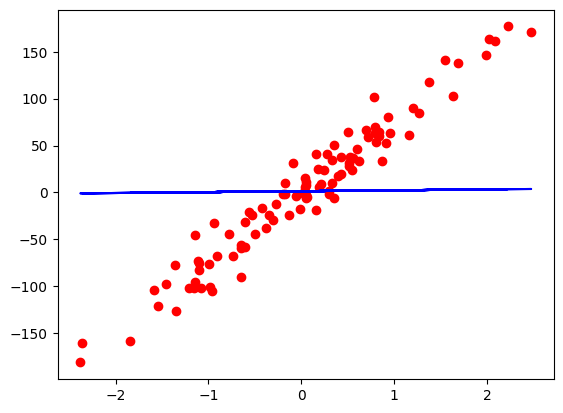

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

x_numpy,y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

X = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0],1)

n_smaples, n_features = X.shape
input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size)

learning_rate = 0.01
n_iter = 100

loss = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

for epoch in range(n_iter):
  y_pred = model(X)
  l = loss(y_pred, y)
  l.backward()
  optimizer.step()

  optimizer.zero_grad()

  if epoch%10 ==0:
     print(f'epoch: {epoch+1}, loss = {l.item():.4f}')

predicted = model(X).detach().numpy()
plt.plot(x_numpy, y_numpy, 'ro')
plt.plot(x_numpy, predicted, 'b')
plt.show()





In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split #train_test_split (from sklearn.model_selection) splits your dataset into 1.Training set → used to learn parameters, 2. Testing set → used to evaluate performance on unseen data

bc = datasets.load_breast_cancer()

X,y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234) #test data = 20%, Same split every time you run the code

sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

class Model(nn.Module):
  def __init__(self,n_input_features):
    super(Model,self).__init__()
    self.linear = nn.Linear(n_input_features,1)

  def forward(self,x):
    y_pred = torch.sigmoid(self.linear(x))
    return y_pred

model = Model(n_features)

n_epoch = 100
learning_rate = 0.1
loss = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)

for epoch in range(n_epoch):
  y_pred = model(X_train)
  l = loss(y_pred,y_train)
  l.backward()
  optimizer.zero_grad()

  if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {l.item():.4f}')


with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()  #What .round() does : Values ≥ 0.5 → 1, Values < 0.5 → 0
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])  #compares y_predicted and y_true and sums no of correct values.  and, accuracy = total correct / total_samples
    print(f'accuracy: {acc.item():.4f}')





epoch: 10, loss = 0.6848
epoch: 20, loss = 0.6848
epoch: 30, loss = 0.6848
epoch: 40, loss = 0.6848
epoch: 50, loss = 0.6848
epoch: 60, loss = 0.6848
epoch: 70, loss = 0.6848
epoch: 80, loss = 0.6848
epoch: 90, loss = 0.6848
epoch: 100, loss = 0.6848


In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

class WineDataset(Dataset):

  def __init__(self):

    xy = np.loadtxt('/content/wine.csv', delimiter = ",", dtype=np.float32, skiprows = 1)
    self.x =torch.from_numpy(xy[:, 1:])
    self.y = torch.from_numpy(xy[:, [0]])
    self.n_samples = xy.shape[0]



  def __getitem__(self, index):
     return self.x[index], self.y[index]

  def __len__(self):
    return self.n_samples

dataset = WineDataset()
dataloader = DataLoader(dataset = dataset, batch_size = 4, shuffle = True, num_workers = 2) #X_batch.shape = (4, n_features)

# dataiter = iter(dataloader)  #  Converts the DataLoader into an iterator,Prepares it to be read batch by batch,I want to manually step through the batches produced by the DataLoade
# data = next(dataiter)  #iter(dataloader) returns an object that can produce batches using next(). Fetches one batch from the DataLoader
# features, labels = data
# print(features, labels)

num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4) #math.ceil means round UP to the nearest integer
print(total_samples, n_iterations)
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(dataloader):

        # here: 178 samples, batch_size = 4, n_iters=178/4=44.5 -> 45 iterations
        # Run your training process
        if (i+1) % 5 == 0:
            print(f'Epoch: {epoch+1}/{num_epochs}, Step {i+1}/{n_iterations}| Inputs {inputs.shape} | Labels {labels.shape}')
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=torchvision.transforms.ToTensor(),
                                           download=True)  #MNIST is a built-in dataset class in torchvision.

train_loader = DataLoader(dataset=train_dataset,
                                           batch_size=3,
                                           shuffle=True)

# look at one random sample
dataiter = iter(train_loader)
data = next(dataiter)
inputs, targets = data
print(inputs.shape, targets.shape)




178 45
Epoch: 1/2, Step 5/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 10/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 15/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 20/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 25/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 30/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 35/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 40/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 45/45| Inputs torch.Size([2, 13]) | Labels torch.Size([2, 1])
Epoch: 2/2, Step 5/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 2/2, Step 10/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 2/2, Step 15/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 2/2, Step 20/45| Inputs torch.Size([4, 1

100%|██████████| 9.91M/9.91M [00:00<00:00, 59.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.69MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.7MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.47MB/s]


torch.Size([3, 1, 28, 28]) torch.Size([3])


In [ ]:
#  In PyTorch, transforms are used to preprocess and sometimes augment data before it is fed into a neural network. Most commonly,
#  they are applied to image datasets using the torchvision.transforms module. Raw images are usually stored as PIL images or NumPy
#  arrays with pixel values ranging from 0 to 255, but neural networks expect input data in the form of tensors with normalized values.
#   Transforms bridge this gap by converting, scaling, and modifying the data in a consistent and reproducible way.

# A very common transform is ToTensor(). This transform converts an image into a PyTorch tensor and scales
# its pixel values from the range [0, 255] to [0.0, 1.0]. It also rearranges the image dimensions from height–width–channels
#  (H, W, C) to channels–height–width (C, H, W), which is the format PyTorch models expect.



In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

class WineDataset(Dataset):

  def __init__(self, transform = True):

    xy = np.loadtxt('/content/wine.csv', delimiter = ",", dtype=np.float32, skiprows = 1)
    self.x =xy[:, 1:]
    self.y = xy[:, [0]]
    self.n_samples = xy.shape[0]
    self.transform = transform



  def __getitem__(self, index):
     sample =  self.x[index], self.y[index]
     if self.transform:
      sample = self.transform(sample)
     return sample


  def __len__(self):
    return self.n_samples

class ToTensor():
  def __call__(self, sample):
    inputs, targets = sample
    return torch.from_numpy(inputs),torch.from_numpy(targets)
class MulTransform():
  def __init__(self,factor):
    self.factor = factor
  def __call__(self,sample):
    inputs, targets = sample
    inputs *= self.factor
    return inputs, targets

dataset = WineDataset(transform = ToTensor())
first_data = dataset[0]
features, labels = first_data
print(features)
print(type(features), type(labels))

composed = torchvision.transforms.Compose([ToTensor(),MulTransform(5)]) #This pipeline converts input data to a tensor and then multiplies it by 4 before feeding it to the model
dataset = WineDataset(transform = composed)
first_data = dataset[0]
features, labels = first_data
print(features)
print(type(features), type(labels))



tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03])
<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([7.1150e+01, 8.5500e+00, 1.2150e+01, 7.8000e+01, 6.3500e+02, 1.4000e+01,
        1.5300e+01, 1.4000e+00, 1.1450e+01, 2.8200e+01, 5.2000e+00, 1.9600e+01,
        5.3250e+03])
<class 'torch.Tensor'> <class 'torch.Tensor'>


In [ ]:
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math


x_np = np.array([2.0, 1.0, 0.1])
x = torch.randn(3, 28*28, requires_grad=True)
Y = torch.tensor([2, 0, 1])


loss = nn.CrossEntropyLoss()
learning_rate = 0.1
n_iter = 1000


class neural1(nn.Module):
  def __init__(self, inputs, neurons,n_classes):
    super(neural1,self).__init__()
    self.linear = nn.Linear(inputs, neurons, n_classes)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(neurons, n_classes) #for binary classification, n_classes = 1, since its prediction 0 or 1
   # self.softmax = nn.softmax(dim = 1)


  def forward(self, x):
    out = self.linear(x)
    out = self.relu(out)
    out = self.linear2(out)
    out = torch.sigmoid(out)

    return out

model = neural1(inputs = 28*28, neurons = 5, n_classes = 3)
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)

for epoch in range(n_iter):

    op = model(x)
    l_fn = loss(op, Y)
    optimizer.zero_grad()
    l_fn.backward()
    optimizer.step()




    if epoch % 100 == 0:
      print(f'{epoch}')
      print(op)
      print(l_fn)






0
tensor([[0.3914, 0.5306, 0.3977],
        [0.3662, 0.6338, 0.3962],
        [0.3616, 0.6348, 0.4844]], grad_fn=<SigmoidBackward0>)
tensor(1.1039, grad_fn=<NllLossBackward0>)
100
tensor([[1.3361e-02, 1.4641e-02, 9.8731e-01],
        [1.0000e+00, 0.0000e+00, 2.7527e-26],
        [0.0000e+00, 1.0000e+00, 0.0000e+00]], grad_fn=<SigmoidBackward0>)
tensor(0.5552, grad_fn=<NllLossBackward0>)
200
tensor([[5.4400e-03, 5.9776e-03, 9.9477e-01],
        [1.0000e+00, 0.0000e+00, 6.7492e-26],
        [0.0000e+00, 1.0000e+00, 0.0000e+00]], grad_fn=<SigmoidBackward0>)
tensor(0.5530, grad_fn=<NllLossBackward0>)
300
tensor([[3.0926e-03, 3.4000e-03, 9.9701e-01],
        [1.0000e+00, 0.0000e+00, 1.1856e-25],
        [0.0000e+00, 1.0000e+00, 0.0000e+00]], grad_fn=<SigmoidBackward0>)
tensor(0.5523, grad_fn=<NllLossBackward0>)
400
tensor([[2.0390e-03, 2.2421e-03, 9.9803e-01],
        [1.0000e+00, 0.0000e+00, 1.7972e-25],
        [0.0000e+00, 1.0000e+00, 0.0000e+00]], grad_fn=<SigmoidBackward0>)
tensor(0.55

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

input_size = 784  # 28x28
hidden_size = 500
num_classes = 10 #how many discinct ans the model allowed to give
num_epochs = 2
batch_size = 100
learning_rate = 0.001

train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)
# examples = iter(test_loader)
# example_data, example_targets = next(examples)

# for i in range(6):
#     plt.subplot(2,3,i+1)
#     plt.imshow(example_data[i][0], cmap='gray')
# plt.show()

class neuralnet(nn.Module):
  def  __init__(self, input_size, hidden_size, num_classes):
    super(neuralnet,self).__init__()
    self.input_size = input_size
    self.l1 = nn.Linear(input_size,hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)

  def forward(self,x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    #no activation at and
    return out

model = neuralnet(input_size, hidden_size, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i, (images,labels) in enumerate(train_loader):
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    outputs= model(images)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1)%100 == 0:
      print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

  with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')










100%|██████████| 9.91M/9.91M [00:00<00:00, 109MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 41.4MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 107MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.25MB/s]


Epoch [1/2], Step [100/600], Loss: 0.3387
Epoch [1/2], Step [200/600], Loss: 0.1338
Epoch [1/2], Step [300/600], Loss: 0.3829
Epoch [1/2], Step [400/600], Loss: 0.2434
Epoch [1/2], Step [500/600], Loss: 0.1482
Epoch [1/2], Step [600/600], Loss: 0.1982
Accuracy of the network on the 10000 test images: 95.59 %
Epoch [2/2], Step [100/600], Loss: 0.1002
Epoch [2/2], Step [200/600], Loss: 0.1295
Epoch [2/2], Step [300/600], Loss: 0.0712
Epoch [2/2], Step [400/600], Loss: 0.0518
Epoch [2/2], Step [500/600], Loss: 0.0377
Epoch [2/2], Step [600/600], Loss: 0.1373
Accuracy of the network on the 10000 test images: 97.01 %
